### Gradient Descent Updater Strategies

Remember that in gradient descent, we are are testing one random value which is a random initialization of the weight vector(s) and from there, we need to find the next step.  The next step we find by calculating the first derivative of the cost function, and then we go in the direction of the steepest descent.  So in gradient descent we update the weight, $\theta$, by subtracting a value from it.  The value we subtract is 

$$\eta\Delta_{\theta}J(\theta_t,X,Y)
$$

where the training data is given in matrix $X$ and matrix $Y$.  And so once this cost function is calculated on the complete data set, we take the derivative(shown as upper case delta sub theta in the equation).  This gives us the gradient($\Delta_{\theta}J(\theta_t,X,Y)$), then we multiply by the learning rate, so that the update will be smaller and then we subtract that from the value of $\theta_t$ and that gives us $\theta_{t+1}$:

$$\theta_{t+1}=\theta_t-\eta\Delta_{\theta}J(\theta_t,X,Y)
$$

So in general that is how gradient descent works.  There is a variation called stochastic gradient descent:

$$\theta_{t+1}=\theta_t-\eta\Delta_{\theta}J(\theta_t,x^{(i)},y^{(i)})
$$

and the only difference in the formula is that you are not computing the gradient under the complete matrix x and the complete matrix y, you just take one training example, which is $x^{(i)}$ and $y^{(i)}$.  So once you have completed the gradient, you will update the parameters theta.  And a variation of this is called mini-batch gradient descent. 

$$\theta_{t+1}=\theta_t-\eta\Delta_{\theta}J(\theta_t,x^{(i\dots i+n)},y^{(i\dots i+n)})
$$

Here you use a batch.  The batch size is defined and you take between 32 and 1024 and you compute the gradient for the batch and once this has been computed you update the gradient theta.

Still another way of doing this is called momentum.  

$$\nu_t=\gamma\nu_{t-1}-\eta\Delta_{\theta}J(\theta_t,X,Y) \\
\theta_{t+1}=\theta_t-\nu_t
$$


The idea of momentum is that we also take an update of a past time step into consideration for computing the update of the current time step.  So in this case, we have a variable called nu ($\nu$), and $\nu$ is computed from $\nu_{t-1}$ and usually we take a gamma of 0.9.  From this subtract the actual gradient  Once you have computed $\nu_t$, we subtract $\nu_t$ from $\theta_t$ and that updates the $\theta_{t+1}$.

A variation of momentum is called Nesterov accelerated gradient:

$$\nu_t=\gamma\nu_{t-1}-\eta\Delta_{\theta}J(\theta_t-\gamma\nu_{t-1},X,Y) \\
\theta_{t+1}=\theta_t-\nu_t
$$

And the only change here from momentum is that in the cost function, we subtract the term $\gamma\nu_{t-1}$ from the $\theta_t$.  You can think of this one as like a ball rolling down a hill, but its a smart ball, so that whenever the slope starts to increase, the ball actually stops accelerating and breaks a bit.

Next we have Adagrad, which stands for adaptive gradient.  Adagrad changes the learning rate over time and not only for a complete batch.  Instead it changes the learning rate for each individual parameter.  You can see that the formula is depending on i, and i stands for each individual parameter.  

$$\theta_{t+1,i}=\theta_{t,i}-\dfrac{\eta}{\sqrt{G_{t,ii}+\epsilon}}\Delta_{\theta}J(\theta_t,X,Y)
$$

The learning rate eta (%\eta%) is divided by the square root term which contains the term $G_{t,ii}$ which is a matrix that contains information based on the past gradients and takes this into account when reducing the learning rate.  Note also the term $\epsilon$ which is there to avoid division by zero.  This whole thing is can be computed using matrix matrix multiplication, and so therefore we can remove the ii, since G is a diagonal matrix:

$$\theta_{t+1,i}=\theta_{t,i}-\dfrac{\eta}{\sqrt{G_t+\epsilon}}\Delta_{\theta}J(\theta_t,X,Y)
$$

Next there is Adadelta, which is currently the only variation of Adagrad:

$$\theta_{t+1,i}=\theta_{t,i}-\dfrac{\eta}{\sqrt{E[\Delta\theta^2]_t+\epsilon}}\Delta_{\theta}J(\theta_t,X,Y)
$$

The only difference is that Adadelta doesn't use a matrix G but instead it continuously computes the mean (denoted above as an expectation) of the historic gradients.  

There are many other variations of gradient descent (RMSProp, Adam, AdaMax).  Look at Sebastien Ruder's blog where everything is well described.  The gradient descent updater strategy is a very important job and it has to be carefully tuned.  Trial and error is often the only way when it comes to this.

ruder.io/optimizing-gradient-descent/

In this link if you go to the image that looks like these:

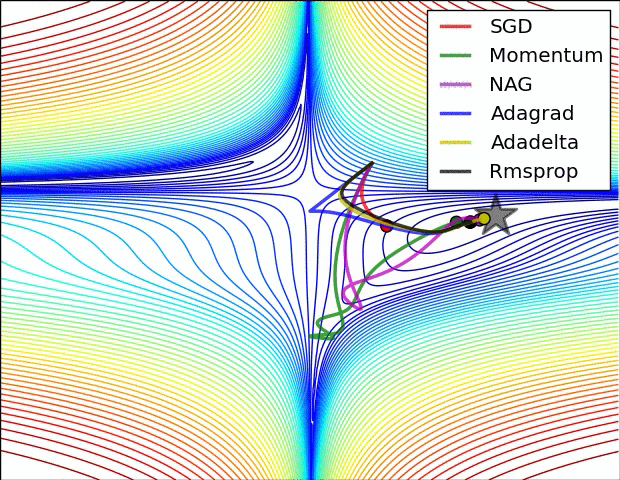

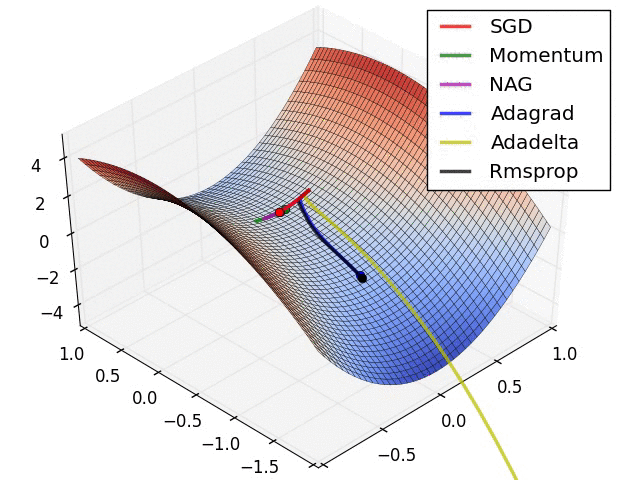

You can see how each of these updater strategies are performing relative to each other.  Adadelta is outperforming the others based on this visual.

[end]